<a href="https://colab.research.google.com/github/vmtmxmf5/Python-Basics/blob/main/%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다. 이 때 적당한 숙박료를 구하시오.
----------

## Step 1. 데이터셋 소개

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

from cycler import cycler

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 150

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# https://www.kaggle.com/subinium/dark-mode-visualization-apple-version

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/AB_NYC_2019.csv')
df.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

## Step 2. EDA 및 데이터 기초 통계 분석


### 데이터 탐색


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

분석할 데이터에 오류로 인해 중복된 값이 존재하는지 확인하고자 한다.

In [ ]:
len(df['id'].unique())

48895

판단 결과 id에 따로 중복값은 없으며 name과 host_name 열에 Null값이 존재한다.  
특히, last_review와 reviews_per_month에 약 10000개 정도의 다량의 Null 값이 존재한다. 이 부분은 리뷰를 작성하지 않은 경우 Null값을 넣은 것으로 보이는 데, 데이터 수집가와 따로 상의할 수 없으므로 일단 본 분석에서는 모두 0으로 전환한 뒤 분석하도록 하겠다.  

In [ ]:
df = df.drop(['id', 'name', 'host_id', 'host_name'], axis=1)

price를 예측하는데 id, name, host_name, host_id는 중요한 정보가 아니므로 drop하도록 하겠다.  

(사실 name은 관련이 있을 수도 있으나 본 분석은 텍스트 분석이 아니라 회귀 분석을 주로 다루기 때문에 배제하도록 하겠다)  

### 데이터 분류
-------------
    1. 수치형 자료
        1) 연속형 자료
            latitude
            longitude
            price
            review per month
        2) 이산형 자료
            minimum night
            # of reviews
            host listings count (호스트가 올린 방 개수)
            availability 365 (365일 중 사용가능일)
    2. 범주형 자료
        1) 명목형 자료
            neighborhood group (방 제공 도시)
            neighborhood (방 제공 도시 세부분류)
            room type

    3. 기타
        1) 날짜 자료
            last review

### 가설 1 : 성수기와 비수기에 따른 가격(label)차이가 존재할 것이다

In [ ]:
from IPython.display import display, HTML

HTML('<style>.output {flex-direction: row;}</style>')

df['last_review'] = pd.to_datetime(df['last_review'])
df['year'] = df['last_review'].dt.year.fillna(method='pad').astype('int')
df['month'] = df['last_review'].dt.month.fillna(method='pad').astype('int')

pivot_month = pd.pivot_table(
    df,
    values=['price'],
    index=['month']
)
pivot_year = pd.pivot_table(
    df,
    values=['price'],
    index=['year']
)
display(pivot_month.transpose())
print('\n')
display(pivot_year.transpose())

month,1,2,3,4,5,6,7,8,9,10,11,12
price,160.582971,162.218124,148.681388,150.621415,146.222805,151.817592,154.797589,138.671158,168.84878,150.575758,140.909897,166.453993


year,2011,2012,2013,2014,2015,2016,2017,2018,2019
price,169.0,158.192308,249.86,165.866667,162.821618,157.296118,145.851086,148.997107,153.128186


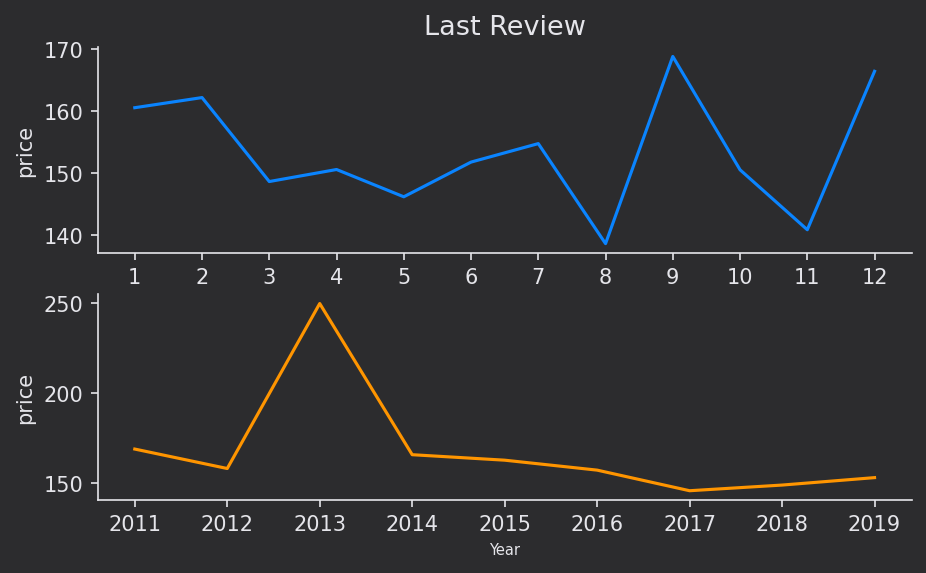

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(7, 4))

ax = axes.ravel()

sns.lineplot(x='month', y='price', data=pivot_month, ax=ax[0])
ax[0].set_title('Last Review', fontsize=13)
ax[0].set_xticks(np.arange(1, 13))
ax[0].set_xlabel('Month', fontsize=7)

sns.lineplot(x='year', y='price', data=pivot_year, ax=ax[1], color=light_palette[1])
ax[1].set_xlabel('Year', fontsize=7)

plt.show()

마지막 리뷰일자를 기준으로 판단할 때 성수기(11~12)와 비수기에 평균 가격 차이가 있을 뿐만 아니라,  

2013년도에도 가격이 두드러지게 높은 경향을 띠고 있음을 알 수 있다.  

따라서 가격과 연관이 있는 Feature로 판단이 되므로 'last_review' Feature 대신 추후 분석모델에 포함하도록 하겠다.

In [ ]:
df.drop('last_review', axis=1, inplace=True)

In [ ]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,2018.316944,6.162593
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,1.162356,2.491616
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,2011.000000,1.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,2018.000000,5.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,2019.000000,6.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,2019.000000,7.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000,12.000000


### 가설 2 : 방 대여를 전문적으로 해주는 곳이 존재한다.
calculated_host_listings_count 열과 availability_365 열의 평균이 median에 비해 배가 넘도록 차이가 난다. 여기서 추론할 수 있는 점 중 하나는 Airbnb **방 대여를 전문적**으로 해주는 곳이 존재할 가능성이 높다는 점이다

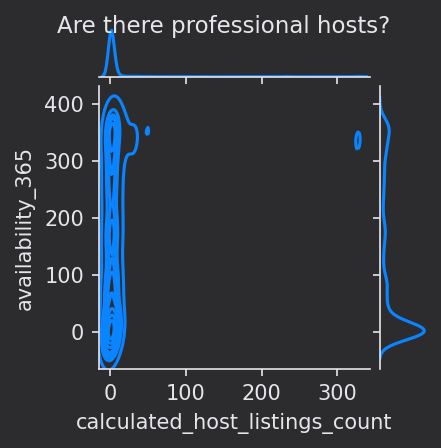

In [ ]:
p = sns.jointplot(
    x='calculated_host_listings_count', 
    y='availability_365', 
    data=df,
    kind='kde',
    height=3)

p.fig.suptitle('Are there professional hosts?', fontsize=11)
plt.show()

### 가설 3 : 뉴욕 내에서 위치에 따른 Rent 비용 차이가 클 것이다


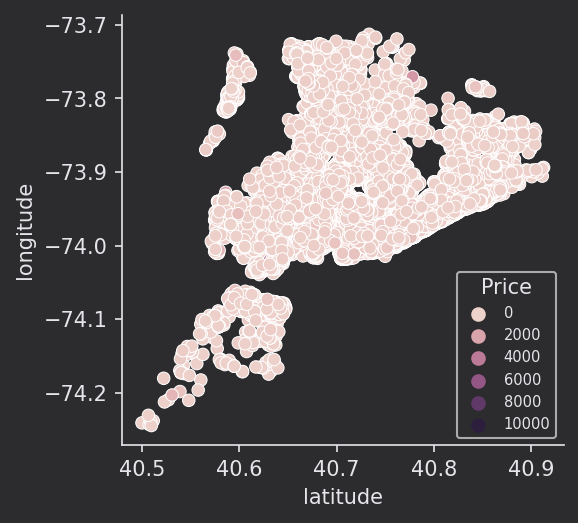

In [ ]:
fig, _ = plt.subplots(figsize=(3.8, 3.8))
sns.scatterplot(x='latitude', y='longitude', hue='price', data=df)
plt.legend(title='Price', loc='lower right', fontsize=7)
plt.show()

시각화를 통해 알아본 결과 가설과는 다르게 지역에 따른 가격차이가 미미하다.  

왜 그럴까?  

혹시 price 단위가 너무 커서 그런 것은 아닐까?

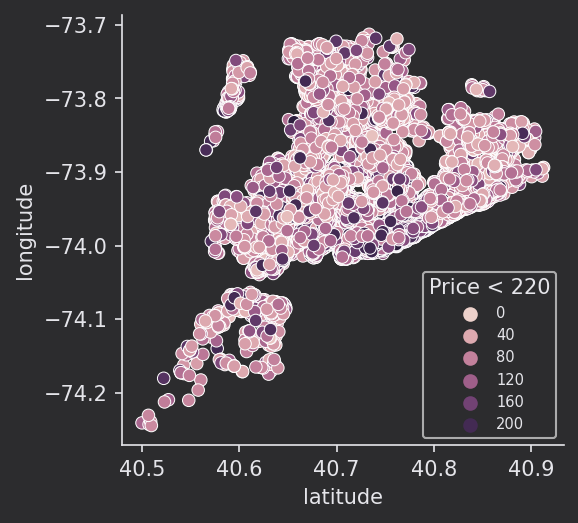

In [ ]:
fig, _ = plt.subplots(figsize=(3.8, 3.8))
df_loc = df[['latitude', 'longitude', 'price']].copy()
df_loc['price_under_220'] = df_loc['price'].copy()
df_loc.loc[df_loc['price_under_220'] > 220] = np.nan
sns.scatterplot(x='latitude', y='longitude', hue='price_under_220', color='gold', data=df_loc)
plt.legend(title='Price < 220', loc='lower right', fontsize=7)
plt.show()

220달러 이상의 가격을 제하고 본다면 구역에 따라 가격의 차이가 존재함을 알 수 있다.  
따라서 구역 범주변수와 위도 경도를 추후 **특성 조합**하도록 하겠다.

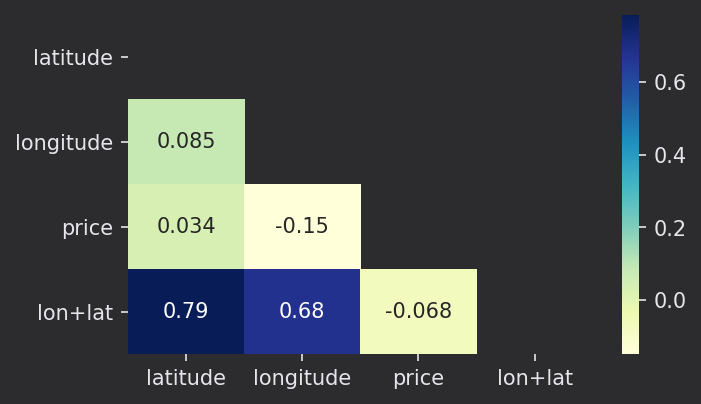

In [ ]:
fig, _ = plt.subplots(figsize=(5, 3))

df_geo = df[['latitude', 'longitude', 'price']].copy()
df_geo['lon+lat'] = df['latitude'] + df['longitude']
mask = np.zeros_like(df_geo.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_geo.corr(), mask=mask, annot=True, cmap='YlGnBu')
plt.show()

그러나 price가 매우 높아 위도 경도와의 상관관계가 낮다.  
위도 경도와 합성을 해봐도 레이블과의 상관관계가 미미함을 알 수 있다.  
(나중에 범주형 변수와 결합하도록 하겠다)

### 가설 4 : Price와 가장 관련이 깊은 수치형 변수는 minimum nights일 것이다

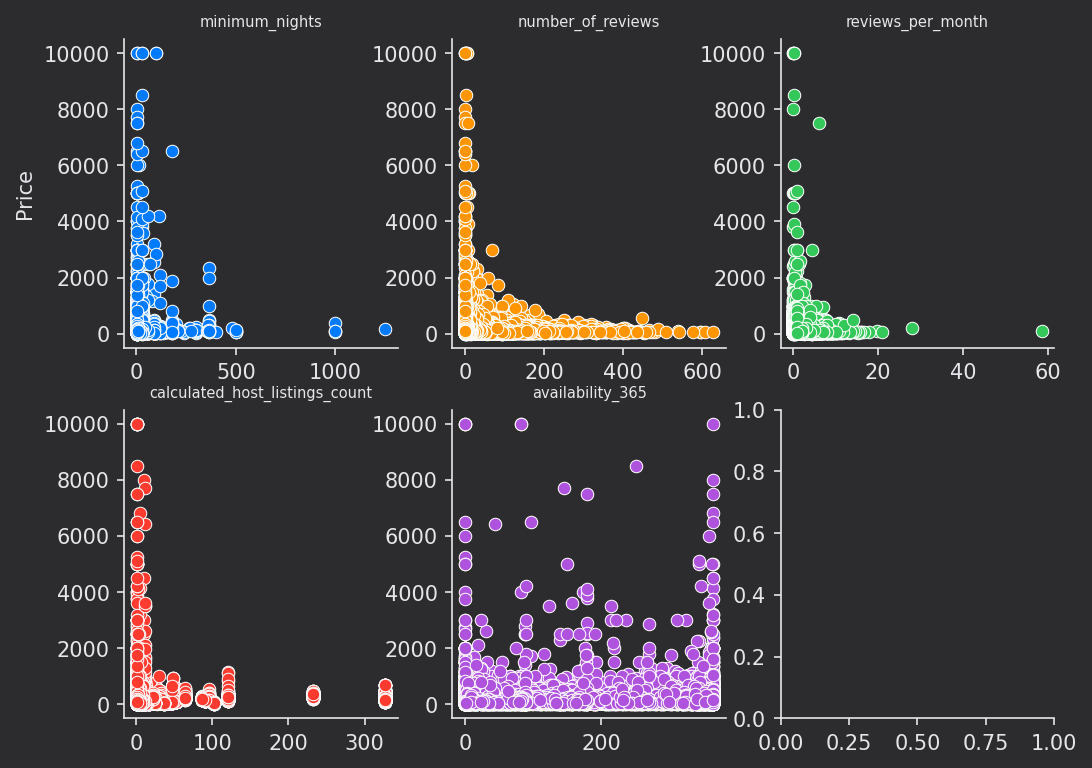

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6))

ax = axes.ravel()
df_num_name = ['minimum_nights', 'number_of_reviews', 'reviews_per_month',
               'calculated_host_listings_count', 'availability_365', 'price'] 
df_num = df[df_num_name].to_numpy()

for i in range(5):
    sns.scatterplot(x=df_num[:, i], y=df_num[:, -1], data=df_num, ax=ax[i], color=light_palette[i])
    ax[i].set_title(df_num_name[i], fontsize=7)
    ax[0].set_ylabel('Price')

In [ ]:
df_num = df[df_num_name]
df_num.corr()['price'].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
reviews_per_month                -0.030608
number_of_reviews                -0.047954
Name: price, dtype: float64

시각화와 상관관계 분석을 진행한 결과 수치형 변수는 레이블과 관계가 미미한 것으로 나타났다.

### 범주형 데이터와 Price 분석

In [ ]:
df_cat = df[['neighbourhood_group', 'neighbourhood','room_type']]
for i in df_cat:
    print(f'{i} :', set(df_cat[i]), '\n')

neighbourhood_group : {'Queens', 'Brooklyn', 'Manhattan', 'Bronx', 'Staten Island'} 

neighbourhood : {'Clifton', 'East Elmhurst', 'Bay Terrace', 'Great Kills', 'Morningside Heights', 'Little Italy', 'Ozone Park', 'Willowbrook', 'DUMBO', 'Cobble Hill', 'Claremont Village', 'Edgemere', 'Todt Hill', 'Fort Wadsworth', 'Fort Greene', 'Two Bridges', 'Breezy Point', 'Richmond Hill', 'Stuyvesant Town', 'Prospect-Lefferts Gardens', 'Flatiron District', 'Williamsbridge', 'Belle Harbor', 'Roosevelt Island', 'Richmondtown', 'Concourse', 'Fort Hamilton', 'Far Rockaway', 'Grymes Hill', 'Sunnyside', 'Harlem', 'Morris Park', 'Pelham Bay', 'Eastchester', 'East New York', 'Rossville', 'Dongan Hills', 'Westerleigh', 'Fieldston', 'Forest Hills', 'City Island', 'Astoria', 'Midland Beach', 'Douglaston', 'Elmhurst', 'Ridgewood', 'Bellerose', 'New Dorp', 'Inwood', 'Mount Eden', "Prince's Bay", 'Midwood', 'Cypress Hills', 'Allerton', 'Bath Beach', 'South Ozone Park', 'Tremont', 'Brooklyn Heights', 'Brighton B

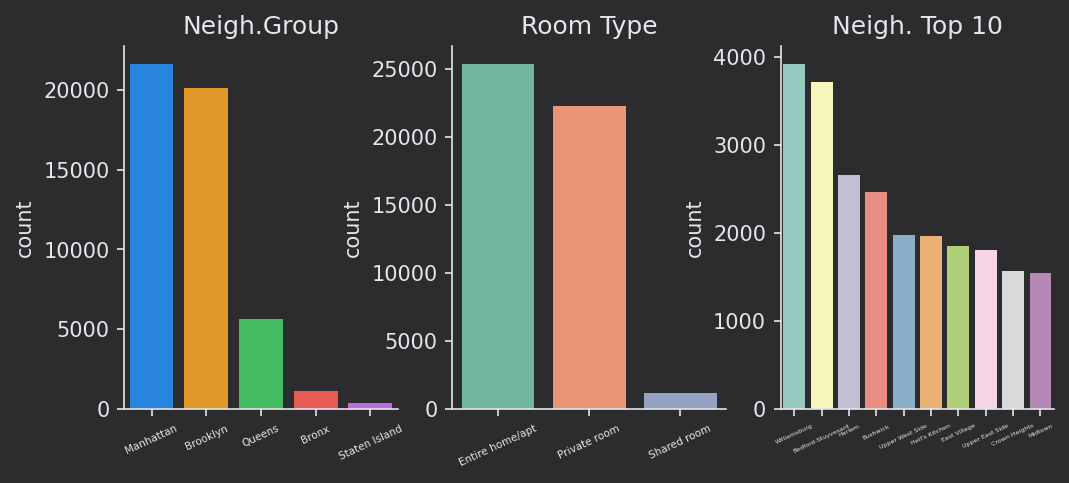

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(8, 3.2))

df_cat2 = pd.concat([df_cat, df['price']], axis=1)
ax = axes.ravel()

sns.countplot(x=sorted(df_cat2['neighbourhood_group']),
              order=df_cat2['neighbourhood_group'].value_counts().index,
              ax=ax[0])
ax[0].set_title('Neigh.Group')
ax[0].set_xticklabels(df_cat2['neighbourhood_group'].value_counts().index, rotation=25, fontsize=5)

sns.countplot(x=sorted(df_cat2['room_type']),
              order=df_cat2['room_type'].value_counts().index,
              ax=ax[1],
              palette='Set2')
ax[1].set_title('Room Type')
ax[1].set_xticklabels(df_cat2['room_type'].value_counts().index, rotation=25, fontsize=5)

sns.countplot(x=sorted(df_cat2['neighbourhood']),
              order=df_cat2['neighbourhood'].value_counts().index[:10],
              ax=ax[2],
              palette='Set3')
ax[2].set_title('Neigh. Top 10')
ax[2].set_xticklabels(df_cat2['neighbourhood'].value_counts().index[:10], rotation=25, fontsize=3)

plt.show()

맨해튼과 브루클린 지역이 가장 많고,  

방 형태는 아파트와 개인용 방이 가장 많다.

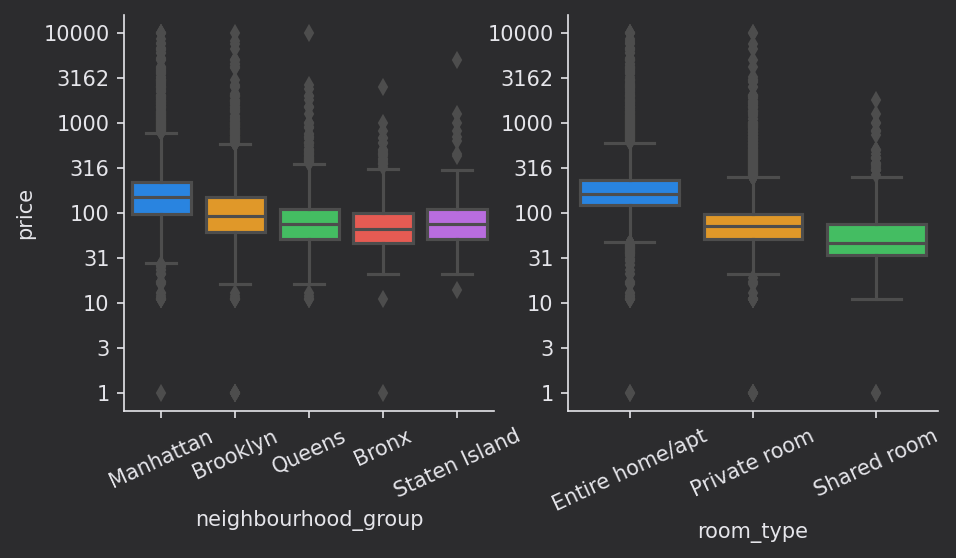

In [ ]:
log_price = np.log10(df['price'] + 1)
log_price = pd.Series(log_price)
ytick_label = np.array([0, 1, 3, 10, 31, 100, 316, 1000, 3162, 10000])
visu = pd.concat([df_cat, log_price], axis=1) 
visual = visu.dropna().copy()

fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))
ax = axes.ravel()
sns.boxplot(
    x=visual['neighbourhood_group'], 
    y=visual['price'], 
    data=visual, 
    orient='v', 
    ax=ax[0],
    order=visual['neighbourhood_group'].value_counts().index)
ax[0].set_xticklabels(labels=visual['neighbourhood_group'].value_counts().index, rotation=25)
# 브로드캐스팅으로 계산하면 숫자에 빈칸이 들어감
ax[0].set(yticklabels=ytick_label)

sns.boxplot(
    x=visual['room_type'], 
    y=visual['price'], 
    data=visual, 
    orient='v', 
    ax=ax[1],
    order=visual['room_type'].value_counts().index)
ax[1].set_xticklabels(labels=visual['room_type'].value_counts().index, rotation=25)
ax[1].set(yticklabels=ytick_label)
ax[1].set(ylabel='')
plt.show()

가격은 범주형 변수와는 무관하게 높은 경우가 많다.  
따라서 이 자체로는 유용하다고 보기 어려우므로 특성 조합을 하도록 하겠다.

## Step 3. 데이터 전처리 및 파이프라인

In [ ]:
df['reviews_per_month'].isnull().value_counts()

False    38843
True     10052
Name: reviews_per_month, dtype: int64

10052개의 Null값이 reviews_per_month에 존재한다  

이는 앞서 언급했듯이 모두 0을 넣도록 하겠다

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('price', axis=1),
    df.price,
    test_size=0.3,
    random_state=42
)

[i.reset_index(drop=True, inplace=True) for i in (X_train, X_test, y_train, y_test)]

[None, None, None, None]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# data[열][행] 으로 indexing해야 작동한다
# data.iloc[:, 열]으로 indexing하면 data[i]를 사용할 수 없으므로 오작동한다
def CountSwitcher(x):
    y = x.value_counts()
    for i in range(len(x)):
        if x[i] in y.index:
            x = x.replace(x[i], y[f'{x[i]}'])
    return x

class CountGroup(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        group = CountSwitcher(X)
        return pd.DataFrame(group)

# toy = X_train['neighbourhood'][0:30].copy()
# tmp = CountGroup()
# toy_trans = tmp.fit_transform(toy)

### 명목형 범주형 변수를 순서형 범주형 변수로 바꿨다.  

| neighbourhood |--| 중복 개수|
|--|--|--|
| Kensigton |  | 2 |
| Midtown |  | 1 |
| Kensigton |  | 2 |
| Harlem |  | 1 |

명목형 변수의 각 group을 중복 개수로 대체한 열을 생성했다.
즉, **명목형 변수에 count 정보**를 추가한 셈이다. 

In [ ]:
class combine(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        combb = X.iloc[:, 0] / X.iloc[:, 1] * X.iloc[:, 2]
        return np.array(combb).reshape(-1, 1)

그 다음 **순서형 범주 / 위도 * 경도** feature를 조합했다

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cg1 = 'neighbourhood_group'
cg2 = 'neighbourhood'

cg_pipe = Pipeline([
    ('cg', CountGroup())                                        
])

cg_fin = ColumnTransformer([
    ('neigh_weight', cg_pipe, cg2),
    ('neigh_group_weight', cg_pipe, cg1)                        
])

numpy_neigh_weight = pd.DataFrame(cg_fin.fit_transform(X_train), columns=['neigh_weight', 'neigh_group_weight'])
X_train2 = pd.concat([X_train, numpy_neigh_weight], axis=1)
numpy_neigh_weight_test = pd.DataFrame(cg_fin.fit_transform(X_test), columns=['neigh_weight', 'neigh_group_weight'])
X_test2 = pd.concat([X_test, numpy_neigh_weight_test], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

comb1 = 'neigh_weight', 'latitude', 'longitude'
comb2 = 'neigh_group_weight', 'latitude', 'longitude'
comb_pipe = Pipeline([
    ('co', combine()),
    ('scc', StandardScaler())                      
])

num = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
       'calculated_host_listings_count', 'availability_365', 'year',
       'month', 'latitude', 'longitude']
num_pipe = Pipeline([
    ('im', SimpleImputer(strategy='constant', fill_value=0)),
    ('sc', MinMaxScaler())
])

cat = ['neighbourhood_group', 'room_type']
cat_pipe = Pipeline([
    ('oh', OneHotEncoder())                     
])

full_pipe = ColumnTransformer([
    ('comb1', comb_pipe, comb1),
    ('comb2', comb_pipe, comb2),
    ('num1', num_pipe, num),
    ('cat1', cat_pipe, cat)                               
])

full_pipe.fit(X_train2)
X_train_scaled = full_pipe.transform(X_train2)
X_test_scaled = full_pipe.transform(X_test2)

## Step 4. Regression 모델 학습하기

### Linear, Lasso, Ridge, XGBoost Regression 모델 학습하기

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor

lin = LinearRegression().fit(X_train_scaled, y_train)
lasso = Lasso().fit(X_train_scaled, y_train)
ridge = Ridge().fit(X_train_scaled, y_train)
xgb = XGBRegressor(objective='reg:squarederror').fit(X_train_scaled, y_train)

In [ ]:
lin_pred = lin.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)
xgb_pred = xgb.predict(X_test_scaled)

In [ ]:
print('Linear Acc: ', (y_test - lin_pred).mean(),
      'Lasso Acc: ', (y_test - lasso_pred).mean(),
      'Ridge Acc: ', (y_test - ridge_pred).mean(),
      'XGB Acc: ', (y_test - xgb_pred).mean())

Linear Acc:  17160.345754150883 Lasso Acc:  11.41203937238348 Ridge Acc:  64.90375862349957 XGB Acc:  13.437939643859863


과소추정을 하고 있는지 과대추정을 하고 있는지 확인하기 위하여 사용했다

In [ ]:
print('Linear: ', lin.score(X_test_scaled, y_test),
      'Lasso: ', lasso.score(X_test_scaled, y_test),
      'Ridge: ', ridge.score(X_test_scaled, y_test),
      'XGB: ', xgb.score(X_test_scaled, y_test))

Linear:  -8062.207091314939 Lasso:  0.11894459884647023 Ridge:  0.018012612998797084 XGB:  0.15144240942001452


### Polynomial Feature
    ??! 스코어가 겨우 0.15??!

실제 레이블보다 모델들이 과소추정을 하고 있다  
그러므로 복잡도를 올리기 위해 polynomial feature를 사용하도록 하겠다

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly.fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
lin = LinearRegression().fit(X_train_poly, y_train)
lasso = Lasso().fit(X_train_poly, y_train)
ridge = Ridge().fit(X_train_poly, y_train)
xgb = XGBRegressor(objective='reg:squarederror').fit(X_train_poly, y_train)

In [ ]:
lin_pred = lin.predict(X_test_poly)
lasso_pred = lasso.predict(X_test_poly)
ridge_pred = ridge.predict(X_test_poly)
xgb_pred = xgb.predict(X_test_poly)

In [ ]:
print('Linear Acc: ', (y_test - lin_pred).mean(),
      'Lasso Acc: ', (y_test - lasso_pred).mean(),
      'Ridge Acc: ', (y_test - ridge_pred).mean(),
      'XGB Acc: ', (y_test - xgb_pred).mean())

Linear Acc:  -136911796.87994677 Lasso Acc:  4.062901217876108 Ridge Acc:  61.46370807017976 XGB Acc:  20.496322631835938


복잡도가 올라간 모습을 보이고 있다

In [ ]:
print('Linear: ', lin.score(X_test_poly, y_test),
      'Lasso: ', lasso.score(X_test_poly, y_test),
      'Ridge: ', ridge.score(X_test_poly, y_test),
      'XGB: ', xgb.score(X_test_poly, y_test))

Linear:  -517958948229.46423 Lasso:  0.1261730547184181 Ridge:  -0.28448856158148916 XGB:  0.12111380971703843


이번에는 예측치가 레이블보다 크다  

Polynomial Feature의 교호작용만을 옵션으로 설정했으나 복잡도 증가폭이 높아 보인다  

따라서 Feature Selection을 통해 영향력이 낮은 Feature를 제거하도록 하겠다

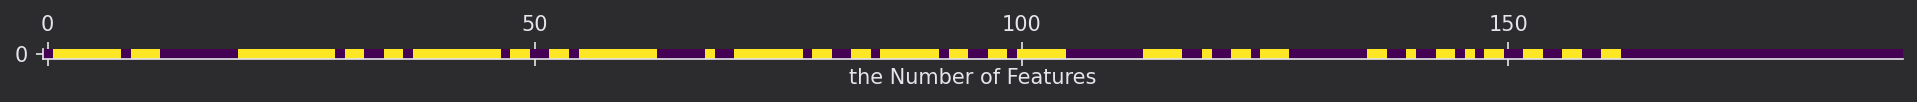

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=20, random_state=42),
    threshold='median'
)

select.fit(X_train_poly, y_train)
X_train_rf = select.transform(X_train_poly)

def selec_vis(selected_mask):
    plt.matshow(selected_mask.reshape(1, -1))
    plt.xlabel('the Number of Features')
    plt.yticks([0])
    plt.show()

selec_vis(select.get_support())

In [ ]:
lin = LinearRegression().fit(X_train_rf, y_train)
lasso = Lasso().fit(X_train_rf, y_train)
ridge = Ridge().fit(X_train_rf, y_train)
xgb = XGBRegressor(objective='reg:squarederror').fit(X_train_rf, y_train)

In [ ]:
print('Linear Acc: ', (y_test - lin_pred).mean(),
      'Lasso Acc: ', (y_test - lasso_pred).mean(),
      'Ridge Acc: ', (y_test - ridge_pred).mean(),
      'XGB Acc: ', (y_test - xgb_pred).mean())

Linear Acc:  -136911796.87994677 Lasso Acc:  4.062901217876108 Ridge Acc:  61.46370807017976 XGB Acc:  20.496322631835938


In [ ]:
X_test_rf = select.transform(X_test_poly)

print('Linear: ', lin.score(X_test_rf, y_test),
      'Lasso: ', lasso.score(X_test_rf, y_test),
      'Ridge: ', ridge.score(X_test_rf, y_test),
      'XGB: ', xgb.score(X_test_rf, y_test))

Linear:  -5009.514455899615 Lasso:  0.09952582581849811 Ridge:  -15.25789570870386 XGB:  -0.011669766021219274


오히려 스코어가 더 낮아졌다  
Feature를 늘린 방식이 선형회귀의 결정계수를 낮춘 원인으로 추정된다  

따라서 PCA 분석을 진행해보겠다

### PCA 분석

In [ ]:
from sklearn.decomposition import PCA

df_pca = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)

X_train0, X_test0, y_train0, y_test0 = train_test_split(
    df_pca.drop('price', axis=1),
    df_pca.price,
    test_size=0.3,
    random_state=42
)

[i.reset_index(drop=True, inplace=True) for i in (X_train0, X_test0, y_train0, y_test0)]

pca = PCA(n_components=0.99)

imp = SimpleImputer(strategy='constant', fill_value=0).fit(X_train0)
X_train1 = imp.transform(X_train0)
X_test1 = imp.transform(X_test0)

std = StandardScaler().fit(X_train1)
X_train2 = std.transform(X_train1)
X_test2 = std.transform(X_test1)

pca.fit(X_train2)
X_train_pca = pca.transform(X_train2)
X_test_pca = pca.transform(X_test2)

xgb_pca = xgb.fit(X_train_pca, y_train0)

In [ ]:
xgb_pca.score(X_test_pca, y_test0)

0.05726164152160674

### 결국 가장 처음 시도했던 전처리 방식이 가장 우수했다

그렇다면 특성 조합을 한 게 스코어를 높이는 데 도움을 줬을까?

아래에서는 특성 조합을 했을 경우와 하지 않았을 경우를 비교해 보겠다

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

num = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
       'calculated_host_listings_count', 'availability_365', 'year',
       'month', 'latitude', 'longitude']
num_pipe = Pipeline([
    ('im', SimpleImputer(strategy='constant', fill_value=0)),
    ('sc', MinMaxScaler())
])

cat = ['room_type']
cat_pipe = Pipeline([
    ('oh', OneHotEncoder())                     
])

full_pipe = ColumnTransformer([
    ('num1', num_pipe, num),
    ('cat1', cat_pipe, cat),                               
])

model_pipe = Pipeline([
    ('full', full_pipe),
    ('XGBRegressor', XGBRegressor(objective='reg:squarederror'))                       
])

xgb_param_grid = {'XGBRegressor__max_depth': [3,5,7], 
              'XGBRegressor__subsample': [0.6, 0.8, 1.0]}

grid = GridSearchCV(
    model_pipe,
    param_grid=xgb_param_grid,
    cv=5
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('full',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('im',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                

In [ ]:
print('테스트 스코어 :', grid.score(X_test, y_test),
      '최적의 파라미터 :', grid.best_params_)

테스트 스코어 : 0.16436054023650826 최적의 파라미터 : {'XGBRegressor__max_depth': 5, 'XGBRegressor__subsample': 0.6}


### 특성 조합(위도 경도 조합은 배제) + 그리드 서치

In [ ]:
num = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
       'calculated_host_listings_count', 'availability_365', 'year',
       'month', 'latitude', 'longitude', 'neigh_group_weight', 'neigh_weight']
num_pipe = Pipeline([
    ('im', SimpleImputer(strategy='constant', fill_value=0)),
    ('sc', MinMaxScaler())
])

cat = ['room_type', 'neighbourhood_group']
cat_pipe = Pipeline([
    ('oh', OneHotEncoder())                     
])

full_pipe = ColumnTransformer([
    ('num1', num_pipe, num),
    ('cat1', cat_pipe, cat)                               
])

model_pipe = Pipeline([
    ('full', full_pipe),
    ('XGBRegressor', XGBRegressor(objective='reg:squarederror'))                       
])

xgb_param_grid = {'XGBRegressor__max_depth': [3, 5, 7], 
                  'XGBRegressor__subsample': [0.6, 0.8, 1.0],
                  }

grid = GridSearchCV(
    model_pipe,
    param_grid=xgb_param_grid,
    cv=5
)

grid.fit(X_train4, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('full',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('im',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                

## Step 6. 모델 학습 결과 해석


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, grid.best_estimator_.predict(X_test4))
rmse = np.sqrt(mse)

In [ ]:
print('테스트 스코어 :', grid.score(X_test4, y_test), '\n',
      'RMSE :', rmse, '\n',
      '최적의 파라미터 :', grid.best_params_)

테스트 스코어 : 0.17431050701883877 
 RMSE : 182.61263819928968 
 최적의 파라미터 : {'XGBRegressor__max_depth': 5, 'XGBRegressor__subsample': 0.8}


### 로그 값과 추측 값의 Scatter plot 시각화하기


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


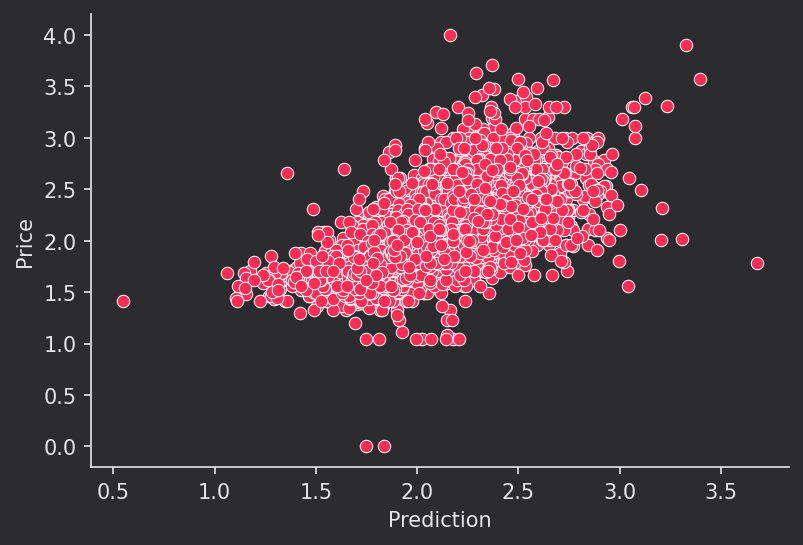

In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
xgb_pred = grid.best_estimator_.predict(X_test4)

sns.scatterplot(x=np.log10(xgb_pred+1), y=np.log10(y_test+1), color=light_palette[5])
plt.xlabel('Prediction')
plt.ylabel('Price')
plt.show()